In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the Election Dataset:

In [ ]:
ed=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/ElectionData.csv')

Identification of data types:

In [ ]:
ed.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

Size of the dataset:

In [ ]:
ed.shape

(21643, 28)

Statistical Summary of Numberic Variables

In [ ]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [ ]:
ed.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [ ]:
ed.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [ ]:
ed.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


Non-Graphical Univariate Analysis:

In [ ]:
#To get the different political party's

ed['Party'].value_counts()

PCP-PEV      1127
L            1127
PCTP/MRPP    1127
PPD/PSD      1127
IL           1127
PDR          1127
PS           1127
PAN          1127
PNR          1127
CH           1127
CDS-PP       1127
A            1127
B.E.         1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64

In [ ]:
#To get the different territory names

ed['territoryName'].value_counts()

Leiria                 1134
Braga                  1134
Porto                  1134
Território Nacional    1134
Coimbra                1080
Lisboa                 1080
Aveiro                 1080
Viseu                  1080
Madeira                1080
Setúbal                1080
Viana do Castelo       1080
Guarda                 1026
Évora                  1026
Faro                   1026
Santarém               1026
Castelo Branco          972
Bragança                972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [ ]:
#Finding null values

print(ed.isnull().sum(axis = 0))

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64


Graphical Univariate Analysis:

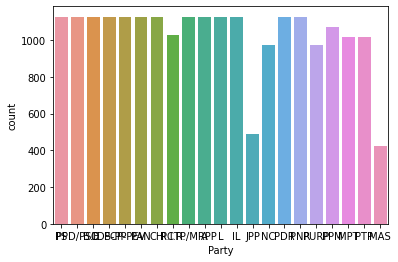

In [ ]:
#CountPlot

sns.countplot(ed.Party)

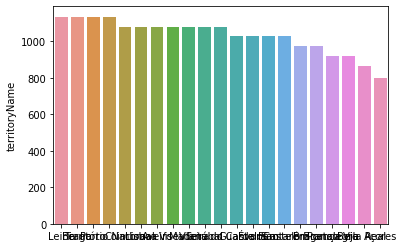

In [ ]:
#Barplot
x=ed['territoryName'].value_counts()
sns.barplot(x.index,x)

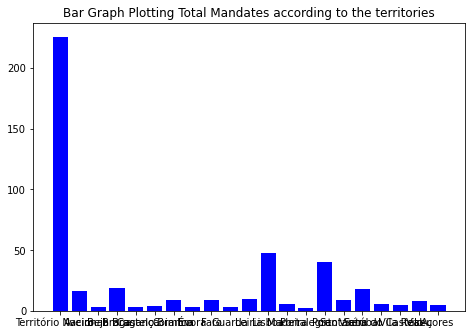

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ed['territoryName'],ed['totalMandates'], color = 'b')
plt.title('Bar Graph Plotting Total Mandates according to the territories')
plt.show()

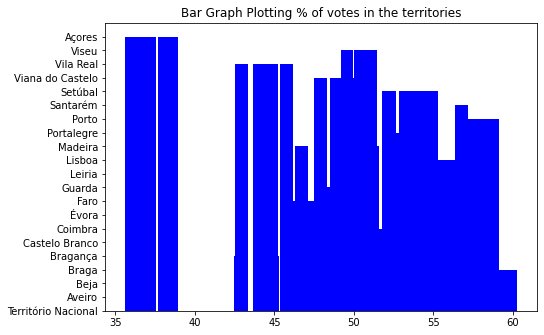

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ed['votersPercentage'],ed['territoryName'], color = 'b')
plt.title('Bar Graph Plotting % of votes in the territories')
plt.show()

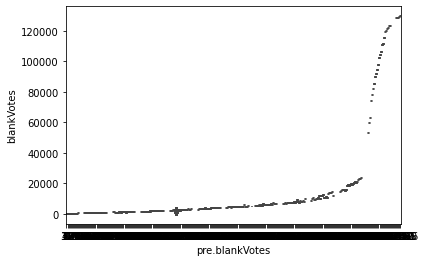

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=ed['pre.blankVotes'],y=ed['blankVotes'])

In [ ]:
#checking for correaltion between variables

ed.corr()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.181595,-0.144312,0.170285,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


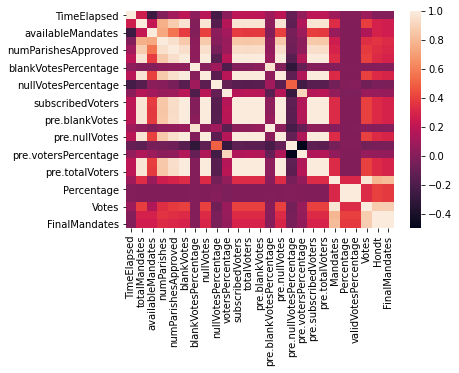

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(ed.corr())

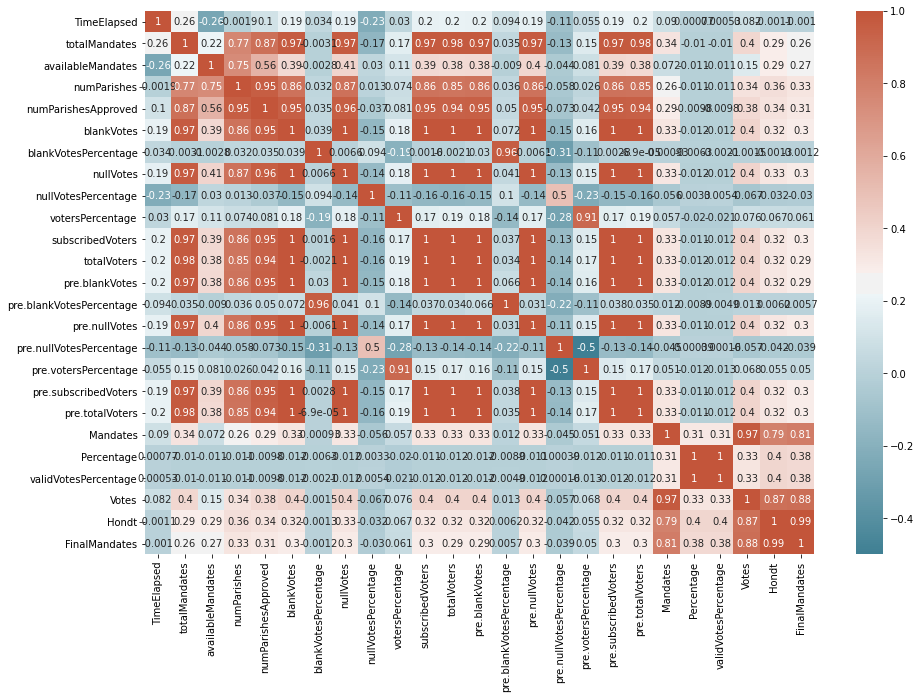

In [ ]:
corr = ed.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#Find Avgerage blank votes w.r.t the territory

ed.groupby('territoryName')['blankVotes'].mean()

territoryName
Aveiro                  7021.203704
Açores                  3328.765957
Beja                    1173.296296
Braga                  10951.000000
Bragança                1034.407407
Castelo Branco          1887.981481
Coimbra                 5061.240741
Faro                    3700.740741
Guarda                  1728.814815
Leiria                  5810.388889
Lisboa                 11730.944444
Madeira                  525.166667
Portalegre               951.666667
Porto                  12951.407407
Santarém                4696.888889
Setúbal                 4198.240741
Território Nacional    87335.537037
Viana do Castelo        3019.981481
Vila Real               1843.611111
Viseu                   4188.944444
Évora                   1278.074074
Name: blankVotes, dtype: float64

In [ ]:
#Find Avgerage pervious blank votes w.r.t the territory

ed.groupby('territoryName')['pre.blankVotes'].mean()

territoryName
Aveiro                  6064.129630
Açores                  2573.851064
Beja                    1055.907407
Braga                   8068.648148
Bragança                 946.203704
Castelo Branco          1761.777778
Coimbra                 4325.074074
Faro                    3234.555556
Guarda                  1464.722222
Leiria                  4883.314815
Lisboa                 10801.222222
Madeira                  771.148148
Portalegre               909.925926
Porto                  11250.666667
Santarém                3995.518519
Setúbal                 3648.870370
Território Nacional    74891.462963
Viana do Castelo        2705.166667
Vila Real               1567.129630
Viseu                   3553.703704
Évora                   1072.370370
Name: pre.blankVotes, dtype: float64

In [ ]:
#Checking the skewness

ed.skew()

TimeElapsed                 -0.005496
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ed['territoryName'] = le.fit_transform(ed['territoryName'])
ed['votersPercentage'] = le.fit_transform(ed['votersPercentage'])
ed.head(5)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [ ]:
#dummifying data required for spliting the data

ed = pd.get_dummies(ed)
ed.head(5)

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,time_2019-10-06 20:10:02,time_2019-10-06 20:15:02,time_2019-10-06 20:20:02,time_2019-10-06 20:25:02,time_2019-10-06 20:30:02,time_2019-10-06 20:35:02,time_2019-10-06 20:40:02,time_2019-10-06 20:45:02,time_2019-10-06 20:50:01,time_2019-10-06 20:55:01,time_2019-10-06 21:00:01,time_2019-10-06 21:05:01,time_2019-10-06 21:10:01,time_2019-10-06 21:15:02,...,time_2019-10-06 23:05:01,time_2019-10-06 23:10:02,time_2019-10-06 23:15:01,time_2019-10-06 23:20:01,time_2019-10-06 23:25:02,time_2019-10-06 23:30:01,time_2019-10-06 23:35:02,time_2019-10-06 23:40:01,time_2019-10-06 23:45:02,time_2019-10-06 23:50:02,time_2019-10-06 23:55:01,time_2019-10-07 00:00:02,time_2019-10-07 00:05:01,time_2019-10-07 00:10:02,time_2019-10-07 00:15:01,time_2019-10-07 00:20:02,time_2019-10-07 00:25:01,time_2019-10-07 00:30:02,time_2019-10-07 00:35:01,Party_A,Party_B.E.,Party_CDS-PP,Party_CH,Party_IL,Party_JPP,Party_L,Party_MAS,Party_MPT,Party_NC,Party_PAN,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.
0,0,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,0,38.29,40.22,147993,94,106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,0,33.28,34.95,128624,81,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,0,6.81,7.15,26307,16,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,0,4.90,5.14,18923,12,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,16,0,226,3092,1081,9652,2.5,8874,2.3,93,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,0,4.59,4.83,17757,11,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = ed['votersPercentage']
X = ed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        93
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00        34
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00        30
          17       1.00    

In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        93
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00        34
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00        30
          17       1.00    

In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()


In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))

Decision Tree: 0.667156 (0.070175)
Decision Tree with Gini Coefficient: 0.653896 (0.076702)
K Nearest Neighbors: 0.647796 (0.074614)
Naive Bayes: 0.602371 (0.065976)
Random Forrest: 0.658562 (0.073086)
Random Forrest with Gini Coefficient: 0.661333 (0.070329)
Bagging Classifier: 0.657637 (0.072881)
Ada Boost Classifier: 0.079191 (0.003619)


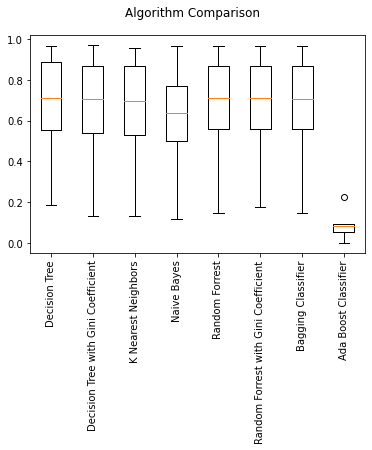

In [ ]:

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(rfc,'ElectionAnalysis.pkl')

['ElectionAnalysis.pkl']